In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Define Functions

In [13]:
def fourier_series_approximation_ak(a_k_func, t, N, T):
    """
    Compute the Fourier series approximation of a signal.

    Parameters:
    a_k_func: function
        Function to compute the Fourier series coefficients a_k.
    t: numpy array
        Time values where the signal is evaluated.
    N: int
        Number of harmonics to include in the approximation.
    T: float
        Period of the signal.

    Returns:
    numpy array
        The Fourier series approximation of the signal at time t.
    """
    
    x_approx = np.zeros_like(t, dtype=np.complex128)
    
    for k in range(-N, N + 1):
        a_k = a_k_func(k)
        x_approx += a_k * ( np.cos((2 * np.pi * k / T) * t) + 1j * np.sin((2 * np.pi * k / T) * t) )
        
    return x_approx.real

def fourier_series_approximation_ck(c_k_func, t, N):
    """
    Compute the Fourier series approximation of a signal.

    Parameters:
    x_func: function
        The original signal function x(t).
    c_k_func: function
        Function to compute the Fourier series coefficients c_k = a_k + a_-k.
    t: numpy array
        Time values where the signal is evaluated.
    N: int
        Number of harmonics to include in the approximation.

    Returns:
    numpy array
        The Fourier series approximation of the signal at time t.
    """
    
    x_approx = np.zeros_like(t)
    
    for k in range(0, N + 1):
        c_k = c_k_func(k, t)
        x_approx += c_k
        
    return x_approx

---

## Problem 1
Find the Fourier series of the following periodic function:

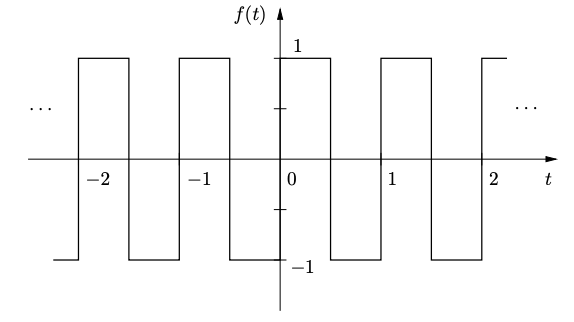

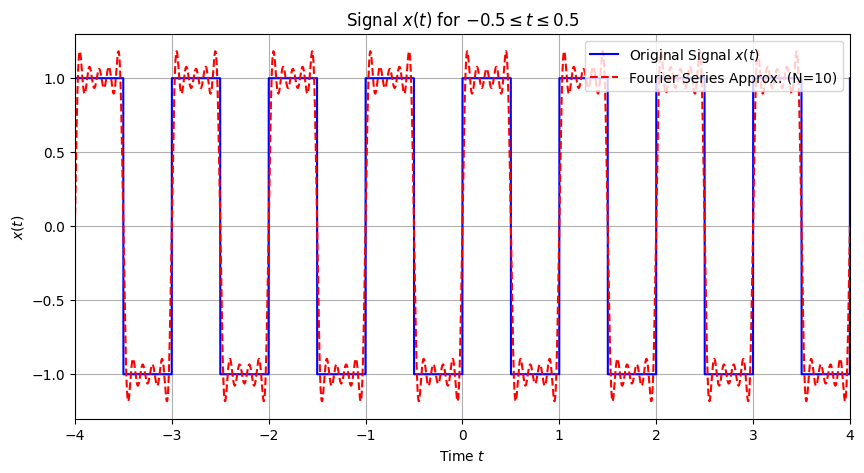

In [27]:
# Problem 1.

# Parameters
T = 1

# Signal Definition
def x(t):
    if -T/2 <= t < T/2:
        return (-1 if t < 0 else 1)
    elif t >= T/2:
        return x(t - T)
    else:
        return x(t + T)

vec_x = np.vectorize(x)

# Fourier Series Coefficients
def ak(k: int):
    if k == 0:
        return 0
    elif k % 2 == 0:
        return 0
    else:
        return -2j / (np.pi * k)

def ck(k: int, t):
    if k > 0 and k % 2 == 1:
        return ( 4 / (np.pi * k) ) * np.sin(2 * np.pi * k * t)
    else:
        return np.zeros_like(t)


# Plotting the signal
t = np.linspace(-4 * T, 4 * T, 10000)
x_t = vec_x(t)

# Fourier Series Approximation
N_harmonics = 10
x_approx_ak = fourier_series_approximation_ak(ak, t, N_harmonics, T=T)
x_approx_ck = fourier_series_approximation_ck(ck, t, N_harmonics)


# Plotting
plt.figure(figsize=(10, 5))
plt.title(rf"Signal $x(t)$ for $-{T/2} \leq t \leq {T/2}$")
plt.xlim(-4 * T, 4 * T)
plt.xlabel(r"Time $t$")
plt.ylabel(r"$x(t)$")

plt.plot(t, x_t, label=r"Original Signal $x(t)$", color="blue")
plt.plot(t, x_approx_ak, label=f"Fourier Series Approx. (N={N_harmonics})", color="red", linestyle="--")
# plt.plot(t, x_approx_ck, label=f"Fourier Series Approx. (N={N_harmonics})", color="green", linestyle="--")

plt.grid()
plt.legend(loc="upper right")
plt.savefig("../images/problem_1.png", dpi=300)
plt.show()

## Problem 2
Find the Fourier Series (FS) of the periodic function $ x(t) $ which are provided as follows.

1. $ x(t) = \frac{\pi t^3}{2};\; -1 < t < 1 $

2. $ x(t) = \pi - t;\; -\pi \leq t \leq \pi $

3. $ x(t) = t^2 + \sin^3(\pi t);\; -1 \leq t \leq 1 $

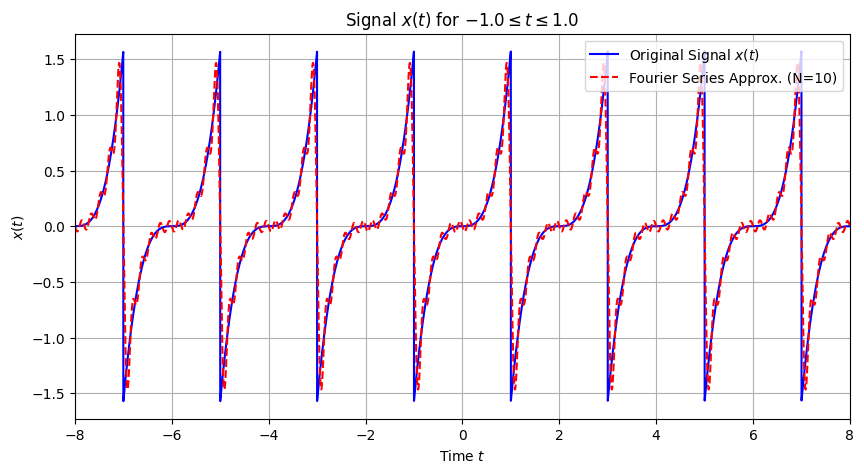

In [26]:
# Problem 2.1.

# Parameters
T = 2

# Signal Definition
def x1(t):
    if -T/2 <= t < T/2:
        return np.pi * (t**3) / 2
    elif t >= T/2:
        return x1(t - T)
    else:
        return x1(t + T)

vec_x1 = np.vectorize(x1)

# Fourier Series Coefficients
def a1k(k: int):
    if k == 0:
        return 0
    else:
        return - ( ((-1) ** k) / (2j * k) ) + ( ( 3 * ((-1) ** k) ) / (1j * (np.pi ** 2) * (k ** 3)) )
    
def c1k(k: int, t):
    if k > 0:
        return ( ((-1) ** k) / k ) * ( 6 / ((np.pi ** 2) * (k ** 2)) - 1 ) * np.sin(np.pi * k * t)
    else:
        return np.zeros_like(t)


# Plotting the signal
t = np.linspace(-4 * T, 4 * T, 10000)
x_t = vec_x1(t)

# Fourier Series Approximation
N_harmonics = 10
x_approx_ak = fourier_series_approximation_ak(a1k, t, N_harmonics, T=T)
x_approx_ck = fourier_series_approximation_ck(c1k, t, N_harmonics)


# Plotting
plt.figure(figsize=(10, 5))
plt.title(rf"Signal $x(t)$ for $-{T/2} \leq t \leq {T/2}$")
plt.xlim(-4 * T, 4 * T)
plt.xlabel(r"Time $t$")
plt.ylabel(r"$x(t)$")

plt.plot(t, x_t, label=r"Original Signal $x(t)$", color="blue")
plt.plot(t, x_approx_ak, label=f"Fourier Series Approx. (N={N_harmonics})", color="red", linestyle="--")
# plt.plot(t, x_approx_ck, label=f"Fourier Series Approx. (N={N_harmonics})", color="green", linestyle="--")

plt.grid()
plt.legend(loc="upper right")
plt.savefig("../images/problem_2_1.png", dpi=300)
plt.show()

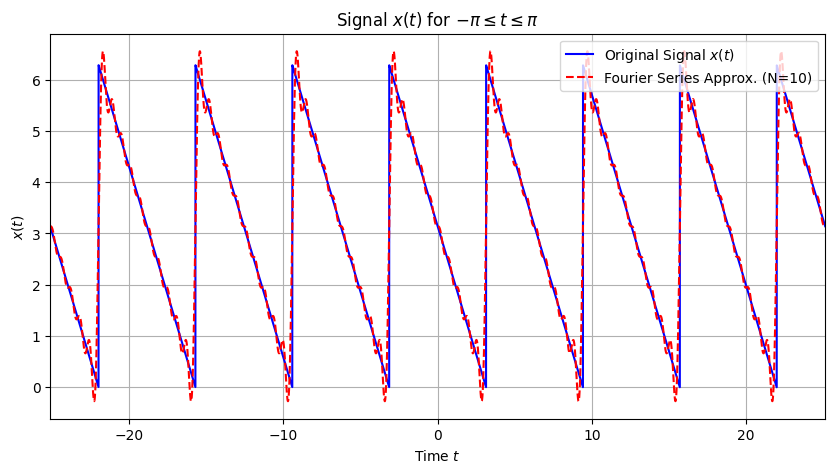

In [21]:
# Problem 2.2.

# Parameters
T = 2 * np.pi

# Signal Definition
def x2(t):
    if -T/2 <= t < T/2:
        return np.pi - t
    elif t >= T/2:
        return x2(t - T)
    else:
        return x2(t + T)

vec_x2 = np.vectorize(x2)

# Fourier Series Coefficients
def a2k(k: int):
    if k == 0:
        return np.pi
    else:
        return ((-1) ** k) / (1j * k)

def c2k(k: int, t):
    if k == 0:
        return np.full_like(t, fill_value=np.pi)
    elif k > 0:
        return ( 2 * ((-1) ** k) / k ) * np.sin(k * t)
    else:
        return np.zeros_like(t)


# Plotting the signal
t = np.linspace(-4 * T, 4 * T, 10000)
x_t = vec_x2(t)

# Fourier Series Approximation
N_harmonics = 10
x_approx_ak = fourier_series_approximation_ak(a2k, t, N_harmonics, T=T)
x_approx_ck = fourier_series_approximation_ck(c2k, t, N_harmonics)


# Plotting
plt.figure(figsize=(10, 5))
plt.title(rf"Signal $x(t)$ for $-\pi \leq t \leq \pi$")
plt.xlim(-4 * T, 4 * T)
plt.xlabel(r"Time $t$")
plt.ylabel(r"$x(t)$")

plt.plot(t, x_t, label=r"Original Signal $x(t)$", color="blue")
plt.plot(t, x_approx_ak, label=f"Fourier Series Approx. (N={N_harmonics})", color="red", linestyle="--")
# plt.plot(t, x_approx_ck, label=f"Fourier Series Approx. (N={N_harmonics})", color="green", linestyle="--")

plt.grid()
plt.legend(loc="upper right")
plt.savefig("../images/problem_2_2.png", dpi=300)
plt.show()

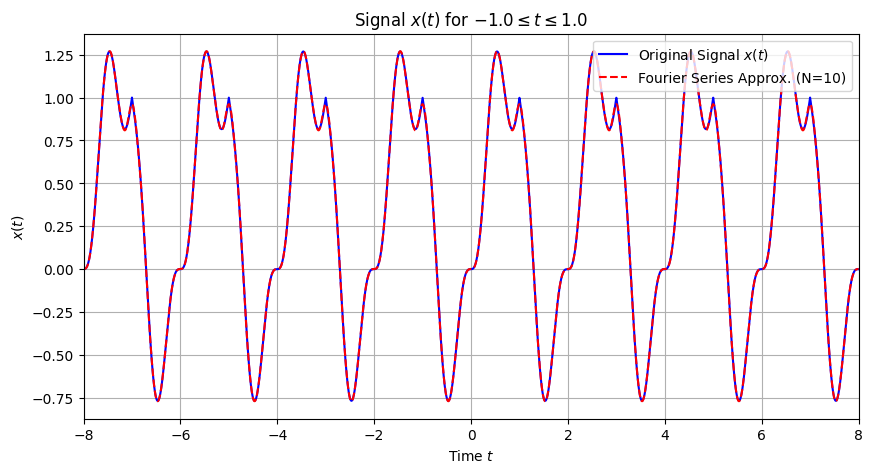

In [24]:
# Problem 2.3.

# Parameters
T = 2

# Signal Definition
def x3(t):
    if -T/2 <= t < T/2:
        return (t ** 2) + (np.sin(np.pi * t) ** 3)
    elif t >= T/2:
        return x3(t - T)
    else:
        return x3(t + T)

vec_x3 = np.vectorize(x3)

# Fourier Series Coefficients
def a3k(k: int):
    if k == 0:
        return 1/3
    elif abs(k) == 1:
        return -(2 / (np.pi ** 2)) - (3j * k / 8)
    elif abs(k) == 3:
        return -(2 / (9 * (np.pi ** 2))) + (1j * k / 24)
    else:
        return 2 * ((-1) ** k) / ((k ** 2) * (np.pi ** 2))
    
def c3k(k: int, t):
    if k == 0:
        return (1 / 3) - (4 / (np.pi ** 2)) * ( np.cos(np.pi * t) + (1 / 9) * np.cos(3 * np.pi * t) ) + (3 / 4) * ( np.sin(np.pi * t) - (1 / 3) * np.sin(3 * np.pi * t) )
    elif k > 0 and k not in [1, 3]:
        return ( 4 * ((-1) ** k) / ( (np.pi ** 2) * (k ** 2) ) ) * np.cos(np.pi * k * t)
    else:
        return np.zeros_like(t)


# Plotting the signal
t = np.linspace(-4 * T, 4 * T, 10000)
x_t = vec_x3(t)

# Fourier Series Approximation
N_harmonics = 10
x_approx_ak = fourier_series_approximation_ak(a3k, t, N_harmonics, T=T)
x_approx_ck = fourier_series_approximation_ck(c3k, t, N_harmonics)


# Plotting
plt.figure(figsize=(10, 5))
plt.title(rf"Signal $x(t)$ for $-{T/2} \leq t \leq {T/2}$")
plt.xlim(-4 * T, 4 * T)
plt.xlabel(r"Time $t$")
plt.ylabel(r"$x(t)$")

plt.plot(t, x_t, label=r"Original Signal $x(t)$", color="blue")
plt.plot(t, x_approx_ak, label=f"Fourier Series Approx. (N={N_harmonics})", color="red", linestyle="--")
# plt.plot(t, x_approx_ck, label=f"Fourier Series Approx. (N={N_harmonics})", color="green", linestyle="--")

plt.grid()
plt.legend(loc="upper right")
plt.savefig("../images/problem_2_3.png", dpi=300)
plt.show()